In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing

In [27]:
# Load data
df = pd.read_pickle("rawFeaturesGTZAN.pkl")

# Split into train and test
data = df.drop(["path", "class"], axis=1)
scaler = preprocessing.StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

X = data.to_numpy()
y = df["class"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

# Get validation set to test parameters for traditional methods on it
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, shuffle=True, stratify=y_train)

In [28]:
def getMetrics(y_pred, y_test):
    acc = accuracy_score(y_pred, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return [acc, precision, recall, f1]

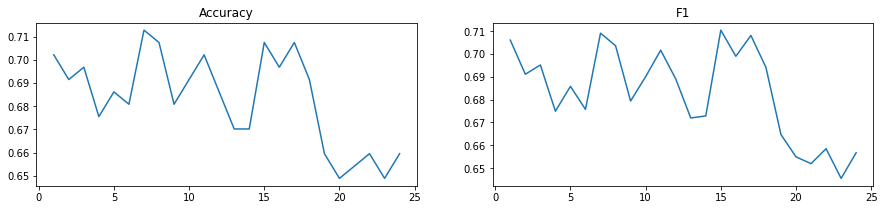

Best k for acc: 7.0 , Best k for F1: 15.0


In [54]:
# Best n for k-NN
def evalKnn(X_train, X_test, y_train, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["k","acc","precision","recall","f1"])
for k in range(1,25):
    y_predCurr = evalKnn(X_train, X_val, y_train, k=k)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [k]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["k"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["k"], results["f1"])
plt.show()

print(f"Best k for acc: {results.iloc[results['acc'].idxmax()]['k']} , Best k for F1: {results.iloc[results['f1'].idxmax()]['k']}")


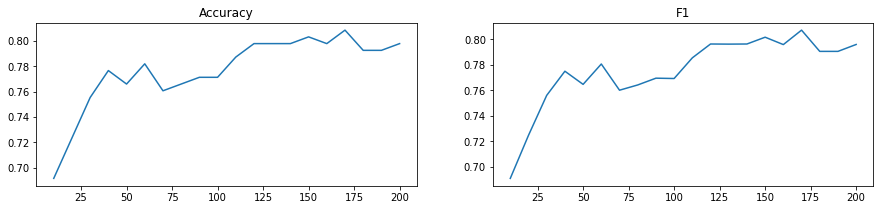

Best n for acc: 170.0 , Best n for F1: 170.0


In [61]:
# Best number of trees in random forest
def evalRandomForest(X_train, X_test, y_train, n=100):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    model = rf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["n","acc","precision","recall","f1"])
for n in range(10,201,10):
    y_predCurr = evalRandomForest(X_train, X_val, y_train, n=n)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [n]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["n"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["n"], results["f1"])
plt.show()

print(f"Best n for acc: {results.iloc[results['acc'].idxmax()]['n']} , Best n for F1: {results.iloc[results['f1'].idxmax()]['n']}")

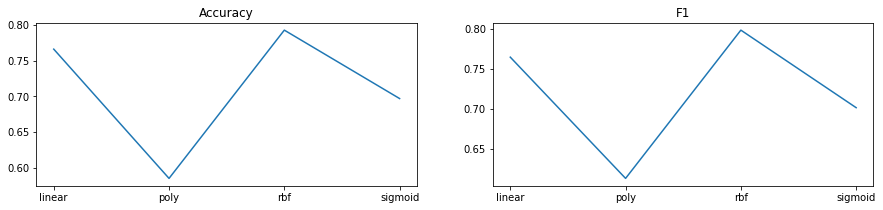

Best kernel for acc: rbf , Best kernel for F1: rbf


In [80]:
def evalSVM(X_train, X_test, y_train, kernel="linear"):
    svm = SVC(kernel=kernel, random_state=42)
    model = svm.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["kernel","acc","precision","recall","f1"])
kernels = ["linear","poly", "rbf", "sigmoid"]
for ker in kernels:
    y_predCurr = evalSVM(X_train, X_val, y_train, kernel=ker)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [ker]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(range(len(kernels)), results["acc"])
plt.xticks(range(len(kernels)), labels=kernels)
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(range(len(kernels)), results["f1"])
plt.xticks(range(len(kernels)), labels=kernels)
plt.show()

print(f"Best kernel for acc: {results.iloc[results['acc'].idxmax()]['kernel']} , Best kernel for F1: {results.iloc[results['f1'].idxmax()]['kernel']}")

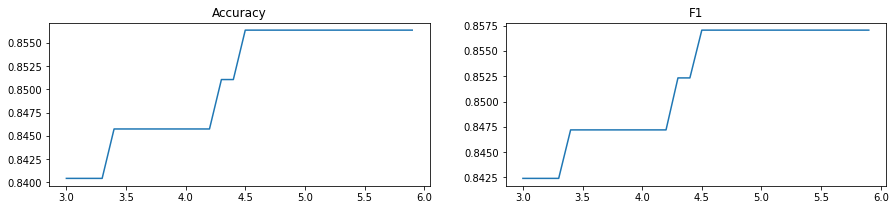

Best c for acc: 4.500000000000002 , Best c for F1: 4.500000000000002


In [97]:
def evalSVM(X_train, X_test, y_train, kernel="rbf", c=1):
    svm = SVC(C=c, kernel=kernel, random_state=42)
    model = svm.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["c","acc","precision","recall","f1"])
for c in np.arange(3,6,0.1):
    y_predCurr = evalSVM(X_train, X_val, y_train, c=c)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [c]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["c"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["c"], results["f1"])
plt.show()

print(f"Best c for acc: {results.iloc[results['acc'].idxmax()]['c']} , Best c for F1: {results.iloc[results['f1'].idxmax()]['c']}")